Assignment 1 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Function to calculate the Euclidean distance between two points
def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2)**2))

In [3]:
# Function to initialize random centroids
def initialize_centroids(data, k):
    indices = np.random.choice(data.shape[0], k, replace=False)
    return data[indices]

In [4]:
# Function to assign points to the closest centroid
def assign_to_clusters(data, centroids):
    clusters = []
    for point in data:
        distances = [euclidean_distance(point, centroid) for centroid in centroids]
        cluster_index = np.argmin(distances)
        clusters.append(cluster_index)
    return np.array(clusters)

In [5]:

# Function to update the centroids based on the assigned points
def update_centroids(data, clusters, k):
    centroids = []
    for i in range(k):
        points_in_cluster = data[clusters == i]
        if len(points_in_cluster) > 0:
            new_centroid = np.mean(points_in_cluster, axis=0)
        else:
            # If no points in the cluster, keep the same centroid
            new_centroid = data[np.random.choice(data.shape[0])]
        centroids.append(new_centroid)
    return np.array(centroids)


In [6]:
# Function to visualize the data and centroids
def plot_clusters(data, clusters, centroids):
    plt.figure(figsize=(8, 6))
    for i in range(len(centroids)):
        points_in_cluster = data[clusters == i]
        plt.scatter(points_in_cluster[:, 0], points_in_cluster[:, 1], label=f'Cluster {i+1}')
    plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=200, label='Centroids')
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.title('K-Means Clustering')
    plt.legend()
    plt.show()

In [7]:
# Function to compute the sum of squared distances (SSD) within clusters
def compute_ssd(data, clusters, centroids):
    ssd = 0
    for i in range(len(centroids)):
        points_in_cluster = data[clusters == i]
        ssd += np.sum((points_in_cluster - centroids[i])**2)
    return ssd


In [8]:

# Function to implement the K-Means algorithm
def kmeans(data, k, max_iterations=100):
    centroids = initialize_centroids(data, k)
    for iteration in range(max_iterations):
        old_centroids = np.copy(centroids)
        clusters = assign_to_clusters(data, centroids)
        centroids = update_centroids(data, clusters, k)
        if np.all(old_centroids == centroids):
            break
    return centroids, clusters

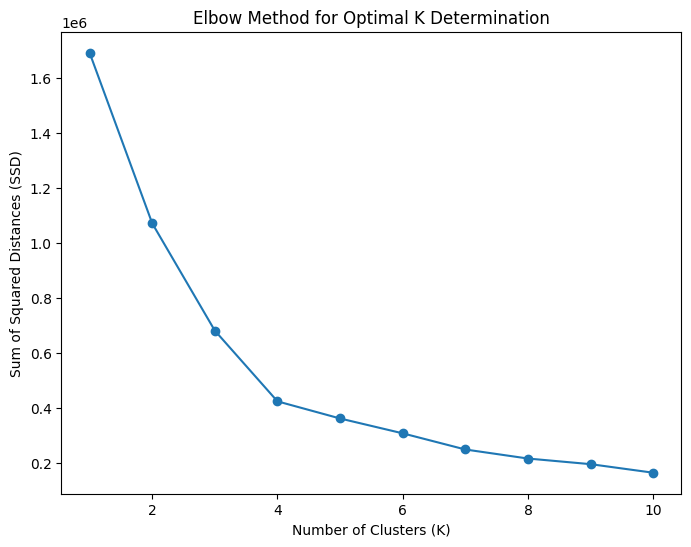

In [9]:
# Generate random data
np.random.seed(42)
data = np.random.randint(1, 100, size=(1000, 2))

# Determine the optimal value of K using the Elbow method
def elbow_method(data, max_k):
    ssd_values = []
    for k in range(1, max_k + 1):
        centroids, clusters = kmeans(data, k)
        ssd = compute_ssd(data, clusters, centroids)
        ssd_values.append(ssd)
    
    # Plot the Elbow curve
    plt.figure(figsize=(8, 6))
    plt.plot(range(1, max_k + 1), ssd_values, marker='o')
    plt.xlabel('Number of Clusters (K)')
    plt.ylabel('Sum of Squared Distances (SSD)')
    plt.title('Elbow Method for Optimal K Determination')
    plt.show()

elbow_method(data, max_k=10)

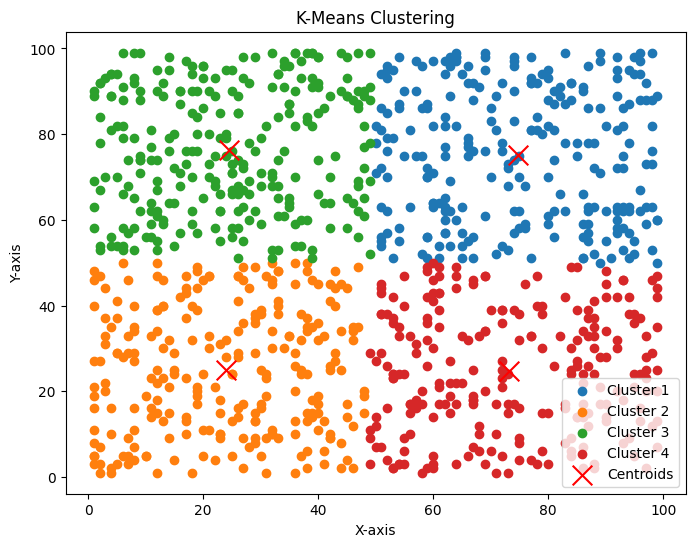

In [10]:
# Perform K-Means clustering with the chosen value of K
k = 4
centroids, clusters = kmeans(data, k)

# Visualize the clusters and centroids
plot_clusters(data, clusters, centroids)

Assignment -2 

In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def read_image(file_path):
    """Read the image and convert it to RGB."""
    image = cv2.imread(file_path)
    if image is None:
        raise FileNotFoundError(f"Failed to read file: {file_path}")
    return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

def preprocess_image(image):
    """Reshape the image to a 2D array of pixels and 3 color values (RGB) and convert to float."""
    pixel_values = image.reshape((-1, 3))
    return np.float32(pixel_values)

def perform_kmeans_clustering(pixel_values, k=3):
    """Perform k-means clustering on the pixel values."""
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
    compactness, labels, centers = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
    return compactness, labels, np.uint8(centers)

def create_segmented_image(pixel_values, labels, centers):
    """Create a segmented image using the cluster centroids."""
    segmented_image = centers[labels.flatten()]
    return segmented_image.reshape(image.shape)

def create_masked_image(image, labels, cluster_to_disable):
    """Create a masked image by disabling a specific cluster."""
    masked_image = np.copy(image).reshape((-1, 3))
    masked_image[labels.flatten() == cluster_to_disable] = [0, 0, 0]
    return masked_image.reshape(image.shape)

def visualize_segmentation(image, segmented_image, masked_image):
    """Display the original image, segmented image, and masked image side by side."""
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    axes[0].imshow(image)
    axes[0].set_title("Original Image")

    axes[1].imshow(segmented_image)
    axes[1].set_title("Segmented Image")

    axes[2].imshow(masked_image)
    axes[2].set_title("Masked Image")

    for ax in axes:
        ax.axis('off')

    plt.show()

def kmeans_segment_fruits(image_path, k=3, cluster_to_disable=2):
    """Segment fruits in the input image using K-Means clustering."""
    image = read_image(image_path)
    pixel_values = preprocess_image(image)
    compactness, labels, centers = perform_kmeans_clustering(pixel_values, k)
    segmented_image = create_segmented_image(pixel_values, labels, centers)
    masked_image = create_masked_image(image, labels, cluster_to_disable)
    visualize_segmentation(image, segmented_image, masked_image)

if __name__ == "__main__":
    # Replace "fruits.jpg" with the actual path to your image file
    image_path = "fruits.jpg"

    # Set the number of clusters (K) and the cluster to disable
    k = 3
    cluster_to_disable = 2

    kmeans_segment_fruits(image_path, k, cluster_to_disable)

Assignment -3 

In [17]:
import numpy as np
import pandas as pd
dataset_file_path = r'C:\Users\SURUJ_KALITA\lr-in\pytorch\Assignment\Heart-Disease-Prediction\heart.csv'

# Read the dataset into a DataFrame using pandas
data = pd.read_csv(dataset_file_path)


In [18]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.decomposition import PCA


Accuracy: 0.8852459016393442
Precision: 0.8787878787878788
Recall: 0.90625
F1 Score: 0.8923076923076922
Confusion Matrix:
[[25  4]
 [ 3 29]]


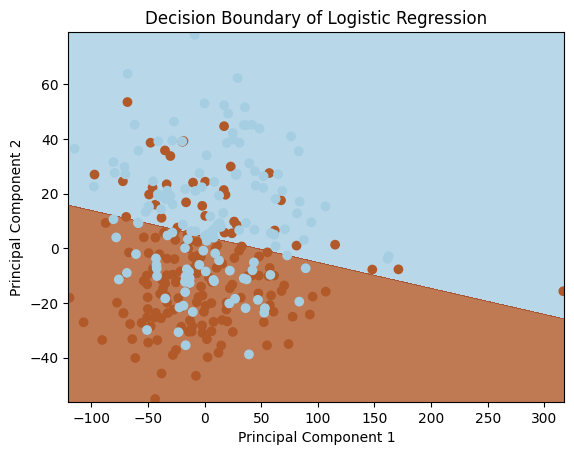

In [19]:
# Step 1: Data Preparation
# Assuming your data is loaded into a DataFrame named 'data'
X = data.drop('target', axis=1)
Y = data['target']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Step 2: Model Training
model = LogisticRegression(max_iter=1000)
model.fit(X_train, Y_train)

# Step 3: Model Evaluation
Y_pred = model.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred)
recall = recall_score(Y_test, Y_pred)
f1 = f1_score(Y_test, Y_pred)
conf_matrix = confusion_matrix(Y_test, Y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:")
print(conf_matrix)

# Step 4: Visualizing Decision Boundary
# As mentioned earlier, we'll use PCA for dimensionality reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Fit the logistic regression model on the reduced data
model_pca = LogisticRegression()
model_pca.fit(X_pca, Y)

# Create a meshgrid to plot the decision boundary
h = .02  # step size in the mesh
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Make predictions on the meshgrid
Z = model_pca.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

# Plot data points
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=Y, cmap=plt.cm.Paired)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Decision Boundary of Logistic Regression')
plt.show()